## Running a SliM3 Simulation with `shadie`

In [1]:
from shadie import Shadie

ImportError: cannot import name 'MutationType' from 'shadie.mutations' (/home/deren/Documents/shadie/shadie/mutations.py)

If no arguments at all are passed to `Shadie()`, then a simple simulation will be created with the following defaults:
* default mutation types (see globals.py)
* default genomic element type = exon (see globals.py)
* mutation rate = 1e-07
* default chromosome structure (same as the structure created with an empty `Chromosome()` is initialized) = a single exon of 2000 base pairs and default mutation types in in equal frequencies
* recomb=1e-9
* generations = 3000
* Ne = 1000
* No population structure (no tree tolopology)

In [2]:
empty = Shadie()

10:48 | WARNING | __init__        | if no tree is provided, 'generations'argument must be provided (defines length of simulation in generations. Default value = 10000
10:48 | INFO    | __init__        | testing part of code: p0


Once the `Shadie` class object is initialized, one can simply run the `write()` function on it. A 'shadie.slim' file will be written to the current directory. It is suggested that the user open this file and inspect it for errors. A user can also open this file (or copy and paste its contents) into the SLiMgui and run the simulation that way. The output can still be accessed by `shadie` postsim functions as long as the `shadie.trees` output file is saved to the same directory as `shadie.slim`

In [3]:
empty.write()

If the user prefers to run the simulation using `shadie`, they can simply call the `run()` function on the `Shadie` class object

In [4]:
empty.run()

The function `postsim()` runs a simple ancestral --> derived mutation count to check that the simulation was successful

In [5]:
empty.postsim()

ancestr	derived	count
A	A	2
A	C	3
A	G	5
A	T	7
C	A	4
C	C	2
C	G	7
C	T	6
G	A	0
G	C	1
G	G	1
G	T	2
T	A	6
T	C	2
T	G	1
T	T	5


The tree sequence object is saved to a `shadie.trees` file and can be accessed by calling `.ts` on the `Shadie` object once the simulation has finished:

In [6]:
empty.ts

In [2]:
#accessing mutation data
for mut in empty.ts.mutations():
    md = mut.metadata
    print(md)

NameError: name 'empty' is not defined

In [19]:
#accessing ancestral genome:
print(empty.ts.newick_trees)

<bound method TreeSequence.newick_trees of <pyslim.slim_tree_sequence.SlimTreeSequence object at 0x7fa8fc06b8b0>>


## Running the SLiMulation with Demography

In [3]:
import toytree
import numpy as np

#Make the tree
tree = toytree.rtree.unittree(ntips=10, treeheight=1e4, seed=123)
randtree = tree.set_node_values(
    feature="Ne", 
    values={i: np.random.randint(10000, 100000) for i in tree.idx_dict}
)

In [5]:
tree_sim = Shadie(tree = randtree)

10:31 | INFO    | __init__        | {'p0': 'p1000', 'p1': 'p1001', 'p2': 'p1002', 'p3': 'p1003', 'p4': 'p1004', 'p5': 'p1005', 'p6': 'p1006', 'p7': 'p1007', 'p8': 'p1008', 'p9': 'p1009', 'p10': 'p10010', 'p11': 'p10011', 'p12': 'p10012', 'p13': 'p10013', 'p14': 'p10014', 'p15': 'p10015', 'p16': 'p10016', 'p17': 'p10017', 'p18': 'p10018'}
10:31 | INFO    | __init__        | testing part of code: p10018


In [6]:
tree_sim.write()

This setup currently runs at ~300 generations/CPU minute which is definitely too long to do anything big *and* this is with a simple single-exon genome and no reproduction. However, it is simulating neutral mutations.

In [ ]:
#tree_sim.run()

## Running the SLiMulation with complex Chromosome Structure

In [2]:
from shadie import Chromosome
from shadie import Build

In [11]:
random_chrom = Build()
random_chrom.random()

11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO 

11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO    | random          | Gene added
11:36 | INFO 

In [12]:
test_chromosome = Chromosome(genome = random_chrom)

In [13]:
test_chromosome.review("interactive")

Interactive altair chromosome map:


*Note* you must check whether the script made a mistake in generating the rarndom chromosome - sometimes it makes a chrromosoome that is loonger than the indicated genome length. This will throw an error in SLiM. Simply repeat the random() function until there is no error (will look like a blank white area on the right side of the interractive chromoosome plot)

In [14]:
testing_chromosome = Shadie(chromosome = test_chromosome)

11:36 | WARNING | __init__        | if no tree is provided, 'generations'argument must be provided (defines length of simulation in generations. Default value = 10000
11:36 | INFO    | __init__        | testing part of code: p0


In [15]:
testing_chromosome.write()

In [16]:
testing_chromosome.run()

This chromosome runs very quickly with no population structure (3000 generations in <30 secs)

In [17]:
testing_chromosome.postsim()

ancestr	derived	count
A	A	22
A	C	1046
A	G	1118
A	T	1115
C	A	1109
C	C	24
C	G	1132
C	T	1101
G	A	1110
G	C	1117
G	G	10
G	T	1073
T	A	1071
T	C	1114
T	G	1119
T	T	18


In [19]:
postsim = testing_chromosome.ts.draw_svg(path = "random-chrom.svg")

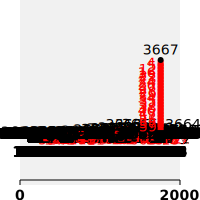

In [20]:
from IPython.display import SVG, display
display(SVG(postsim))

In [28]:
testing_chromosome.ts.Tajimas_D()

array(-1.46925547)

## Running SLiMulation with Alternating Generations

*Note:* Demography does not work with alternating generations, which requires a nonWF model. To run a reproduction simulation, the following arguments must be set: `reproduction = True` and `model = "nonWF"`

In [18]:
altgen_chrom = Shadie(chromosome = test_chromosome, reproduction = True, model = "nonWF")

11:41 | WARNING | __init__        | if no tree is provided, 'generations'argument must be provided (defines length of simulation in generations. Default value = 10000
11:41 | INFO    | __init__        | testing part of code: p0


In [19]:
altgen_chrom.write()

In [20]:
testing_chromosome.run()

KeyboardInterrupt: 